In [1]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
#import statannotations
from statannot import add_stat_annotation


In [16]:
# Open datasets

data_20 = pd.read_csv('../data/img_scout_dfs/2020/INC_coreg_skysat_scout_2020.csv')
data_21 = pd.read_csv('../data/img_scout_dfs/2021/INC_skysat_scout_2021.csv')
data_22 = pd.read_csv('../data/img_scout_dfs/2022/INC_skysat_scout_2022.csv')

dfs = [data_20, data_21, data_22]

In [17]:
# add vis
def add_vis(df):
    df['ndvi']= (df['nir']-df['red'])/(df['nir']+df['red'])
    df['evi']= 2.5*(df['nir']-df['red'])/(df['nir']+6*df['red']-7.5*df['blue']+1)
    df['savi']= 1.5*(df['nir']-df['red'])/(df['nir']+df['red']+0.5)
    df['arvi']=(df['nir']-(2*df['red']-df['blue']))/(df['nir']+(2*df['red']-df['blue']))
    df['grvi']=(df['green']-df['red'])/(df['green']+df['red'])
    df['bgvi'] = df['blue']-df['green']/df['blue']+df['green']

    df['gcc']=df['green']/(df['green']+df['red']+df['blue'])
    df['gri']=df['green']/df['red']
    #df['sr']= df['nir']/df['red']
    #df['msr']= ((df['nir']/df['red'])-1)/(np.sqrt((df['nir']/df['red'])+1))
    #df['dvi']= df['nir']-df['red']
    #df['nirv']= df['ndvi']*df['nir']
    #df['tvi']=0.5*(120*(df['nir']-df['green'])-200*(df['red']-df['green']))
    return df

In [18]:
for df in dfs:
    add_vis(df)
    
    df['inc_class'] = 'low'
    df.loc[df['DM_inc']>25,'inc_class']= 'high'
    
    df['severity_class'] = 'low'
    df.loc[df['DM_severity']>10,'severity_class']= 'high'
    
    df.loc[df['ndvi']<=0.65,'ndvi_group']= '<0.66'
    df.loc[(df['ndvi']> 0.65)&(df['ndvi']<=0.7),'ndvi_group']='0.66-0.70'
    df.loc[(df['ndvi']> 0.7)&(df['ndvi']<=0.75),'ndvi_group']='0.71-0.75'
    df.loc[(df['ndvi']> 0.75)&(df['ndvi']<=0.8),'ndvi_group']='0.76-0.80'
    df.loc[(df['ndvi']> 0.8)&(df['ndvi']<=0.85),'ndvi_group']='0.81-0.85'
    df.loc[(df['ndvi']> 0.85),'ndvi_group']='>0.85'

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

0.76-0.80_low v.s. 0.76-0.80_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.931e-02 U_stat=5.410e+02
0.71-0.75_low v.s. 0.71-0.75_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=8.960e-01 U_stat=1.600e+01
0.81-0.85_low v.s. 0.81-0.85_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.487e-03 U_stat=9.760e+02


Text(0.5, 1.0, 'EVI 2020, All Rows')

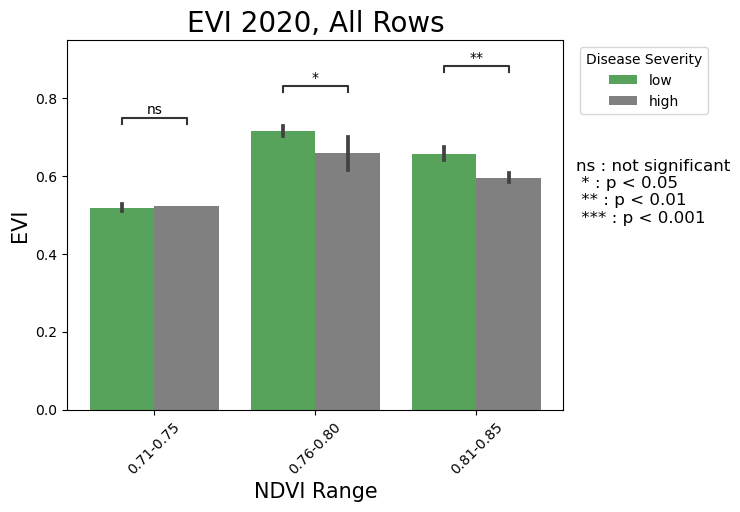

In [19]:
# Disease severity 2020
x = "ndvi_group"
y = "evi"
hue = "severity_class"
hue_order=['low', 'high']
order = ['0.71-0.75','0.76-0.80','0.81-0.85']
pairs=[
    ((order[0], "high"), (order[0], "low")),
    ((order[1], "high"), (order[1], "low")),
    ((order[2], "high"), (order[2], "low"))
    ]

colors = ["#4CAF50", "#808080"]
sns.set_palette(sns.color_palette(colors))

ax = sns.barplot(data=data_20, x=x, y=y, order=order, hue=hue, hue_order=hue_order)
ax.set_xticklabels(labels = ['0.71-0.75','0.76-0.80','0.81-0.85'], 
                   rotation=45)
add_stat_annotation(ax, data=data_20, x=x, y=y, order=order, hue=hue, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("NDVI Range", fontsize=15)
plt.ylabel("EVI", fontsize= 15)
plt.legend(title='Disease Severity',loc='upper left', bbox_to_anchor=(1.02, 1) )
plt.figtext(0.92, 0.5, 'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001', fontsize=12)
plt.title("EVI 2020, All Rows", fontsize=20)
#plt.savefig('evi_by_ndvi_20.jpeg', transparent=True, bbox_inches='tight')

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

0.76-0.80_low v.s. 0.76-0.80_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.037e-02 U_stat=9.230e+02
0.71-0.75_low v.s. 0.71-0.75_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.514e-04 U_stat=1.300e+01


Text(0.5, 1.0, 'EVI 2020, All Rows')

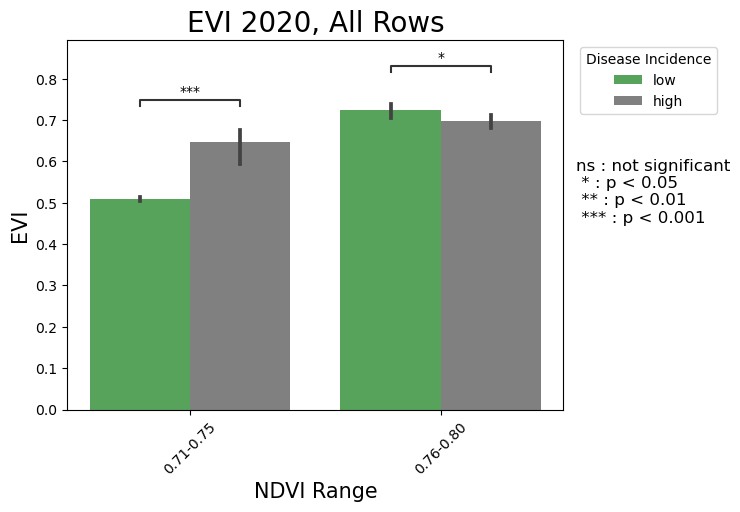

In [20]:
# Disease incidence 2020
x = "ndvi_group"
y = "evi"
hue = "inc_class"
hue_order=['low', 'high']
order = ['0.71-0.75','0.76-0.80']
pairs=[
    ((order[0], "high"), (order[0], "low")),
    ((order[1], "high"), (order[1], "low"))
    ]

colors = ["#4CAF50", "#808080"]
sns.set_palette(sns.color_palette(colors))

ax = sns.barplot(data=data_20, x=x, y=y, order=order, hue=hue, hue_order=hue_order)
ax.set_xticklabels(labels = ['0.71-0.75','0.76-0.80'], 
                   rotation=45)
add_stat_annotation(ax, data=data_20, x=x, y=y, order=order, hue=hue, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("NDVI Range", fontsize=15)
plt.ylabel("EVI", fontsize= 15)
plt.legend(title='Disease Incidence',loc='upper left', bbox_to_anchor=(1.02, 1) )
plt.figtext(0.92, 0.5, 'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001', fontsize=12)
plt.title("EVI 2020, All Rows", fontsize=20)
#plt.savefig('evi_by_ndvi_20.jpeg', transparent=True, bbox_inches='tight')

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

0.71-0.75_low v.s. 0.71-0.75_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=8.611e-14 U_stat=2.605e+04
0.66-0.70_low v.s. 0.66-0.70_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.216e-01 U_stat=1.892e+03
0.76-0.80_low v.s. 0.76-0.80_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=8.774e-57 U_stat=6.496e+04
0.81-0.85_low v.s. 0.81-0.85_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.890e-11 U_stat=1.299e+03


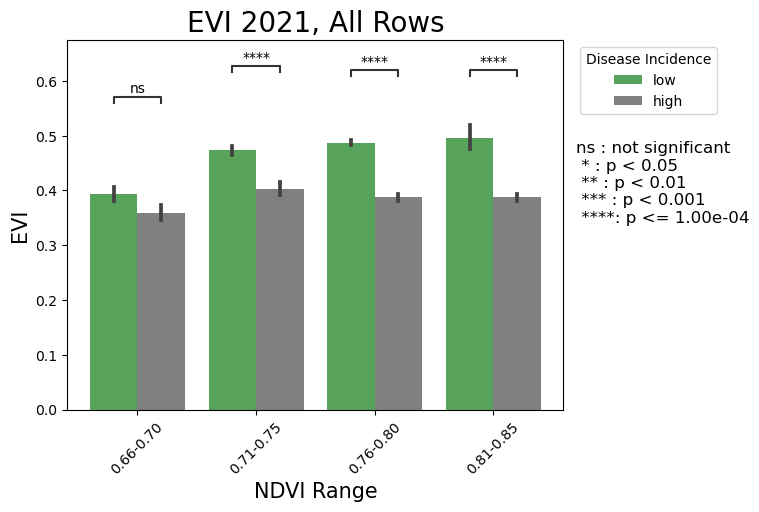

In [25]:
x = "ndvi_group"
y = "evi"
hue = "inc_class"
hue_order=['low', 'high']
order = ['0.66-0.70','0.71-0.75','0.76-0.80','0.81-0.85']
pairs=[
    ((order[0], "high"), (order[0], "low")),
    ((order[1], "high"), (order[1], "low")),
    ((order[2], "high"), (order[2], "low")),
    ((order[3], "high"), (order[3], "low"))
    ]

colors = ["#4CAF50", "#808080"]
sns.set_palette(sns.color_palette(colors))

ax = sns.barplot(data=data_21, x=x, y=y, order=order, hue=hue, hue_order=hue_order)
ax.set_xticklabels(labels = ['0.66-0.70','0.71-0.75','0.76-0.80','0.81-0.85'], 
                   rotation=45)
add_stat_annotation(ax, data=data_21, x=x, y=y, order=order, hue=hue, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("NDVI Range", fontsize=15)
plt.ylabel("EVI", fontsize= 15)
plt.legend(title='Disease Incidence',loc='upper left', bbox_to_anchor=(1.02, 1) )
plt.figtext(0.92, 0.5, 'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001\n ****: p <= 1.00e-04', fontsize=12)
plt.title("EVI 2021, All Rows", fontsize=20)
plt.savefig('evi_by_ndvi.jpeg', transparent=True, bbox_inches='tight')

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

0.71-0.75_low v.s. 0.71-0.75_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=8.750e+02
0.66-0.70_low v.s. 0.66-0.70_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=2.200e+01
0.76-0.80_low v.s. 0.76-0.80_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=2.000e+00


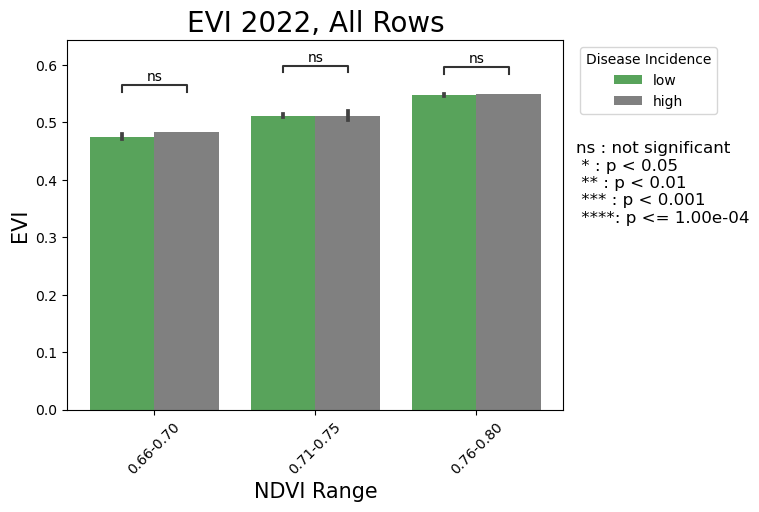

In [27]:
x = "ndvi_group"
y = "evi"
hue = "inc_class"
hue_order=['low', 'high']
order = ['0.66-0.70','0.71-0.75','0.76-0.80']
pairs=[
    ((order[0], "high"), (order[0], "low")),
    ((order[1], "high"), (order[1], "low")),
    ((order[2], "high"), (order[2], "low"))
    ]

colors = ["#4CAF50", "#808080"]
sns.set_palette(sns.color_palette(colors))

ax = sns.barplot(data=data_22, x=x, y=y, order=order, hue=hue, hue_order=hue_order)
ax.set_xticklabels(labels = ['0.66-0.70','0.71-0.75','0.76-0.80'], 
                   rotation=45)
add_stat_annotation(ax, data=data_22, x=x, y=y, order=order, hue=hue, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("NDVI Range", fontsize=15)
plt.ylabel("EVI", fontsize= 15)
plt.legend(title='Disease Incidence',loc='upper left', bbox_to_anchor=(1.02, 1) )
plt.figtext(0.92, 0.5, 'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001\n ****: p <= 1.00e-04', fontsize=12)
plt.title("EVI 2022, All Rows", fontsize=20)
#plt.savefig('evi_by_ndvi_22.jpeg', transparent=True, bbox_inches='tight')

Text(0, 0.5, 'EVI')

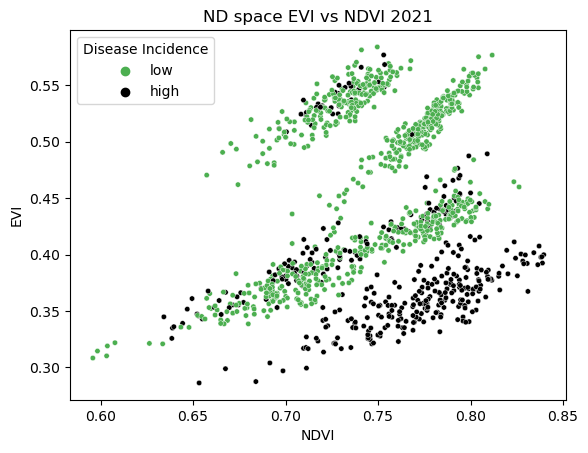

In [28]:
colors = ["#4CAF50", "#000000"]
sns.set_palette(sns.color_palette(colors))
sns.scatterplot(data=data_21, x='ndvi', y='evi', s= 15, hue='inc_class').set(title='ND space EVI vs NDVI 2021')
plt.legend(title='Disease Incidence', loc='upper left')
plt.xlabel("NDVI", fontsize=10)
plt.ylabel("EVI", fontsize= 10)

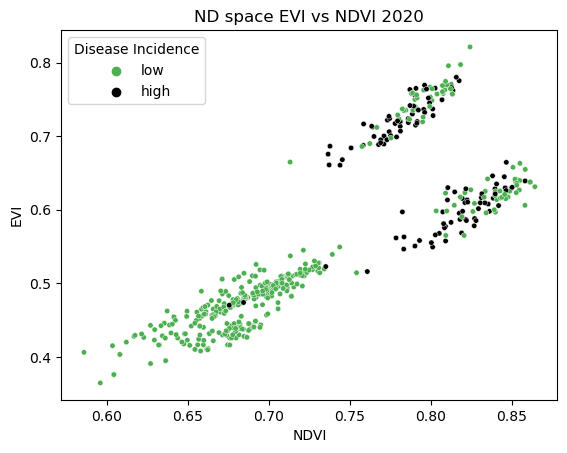

In [29]:
colors = ["#4CAF50", "#000000"]
sns.set_palette(sns.color_palette(colors))
sns.scatterplot(data=data_20, x='ndvi', y='evi', s= 15, hue='inc_class').set(title='ND space EVI vs NDVI 2020')
plt.legend(title='Disease Incidence', loc='upper left')
plt.xlabel("NDVI", fontsize=10)
plt.ylabel("EVI", fontsize= 10)
plt.show()

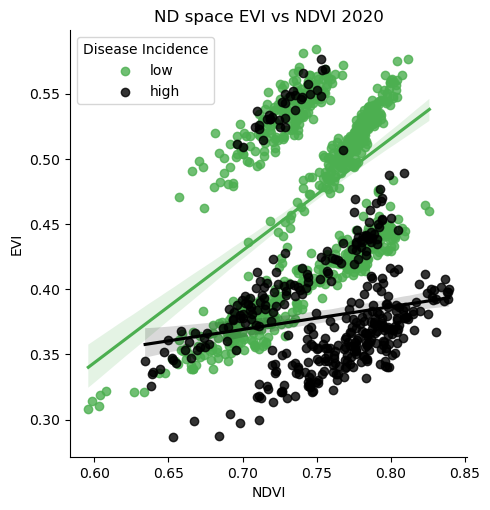

In [30]:
sns.lmplot(x="ndvi", y="evi", hue="inc_class", data=data_21, robust=True, legend=False).set(title='ND space EVI vs NDVI 2020')
plt.xlabel("NDVI", fontsize=10)
plt.ylabel("EVI", fontsize= 10)
plt.legend(title='Disease Incidence', loc='upper left')

plt.show()

Text(0, 0.5, 'GRVI')

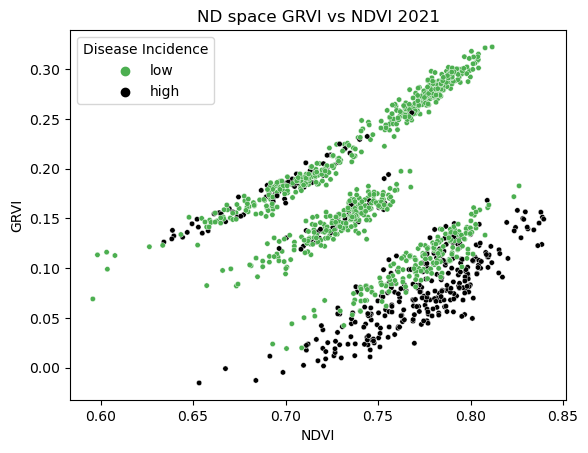

In [32]:
colors = ["#4CAF50", "#000000"]
sns.set_palette(sns.color_palette(colors))
sns.scatterplot(data=data_21, x='ndvi', y='grvi', s= 15, hue='inc_class').set(title='ND space GRVI vs NDVI 2021')
plt.legend(title='Disease Incidence', loc='upper left')
plt.xlabel("NDVI", fontsize=10)
plt.ylabel("GRVI", fontsize= 10)

Text(0, 0.5, 'EVI')

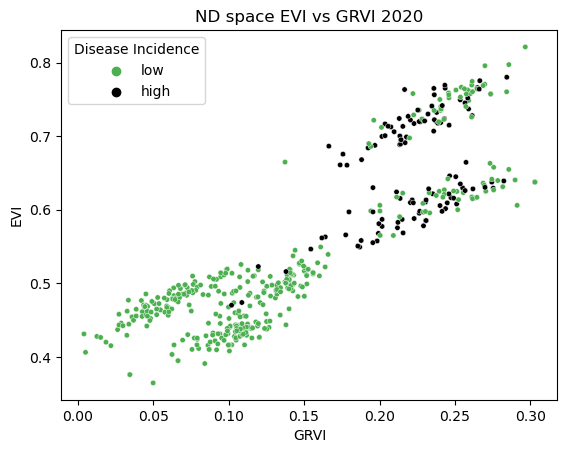

In [34]:
colors = ["#4CAF50", "#000000"]
sns.set_palette(sns.color_palette(colors))
sns.scatterplot(data=data_20, x='grvi', y='evi', s= 15, hue='inc_class').set(title='ND space EVI vs GRVI 2020')
plt.legend(title='Disease Incidence', loc='upper left')
plt.xlabel("GRVI", fontsize=10)
plt.ylabel("EVI", fontsize= 10)

Text(0, 0.5, 'EVI')

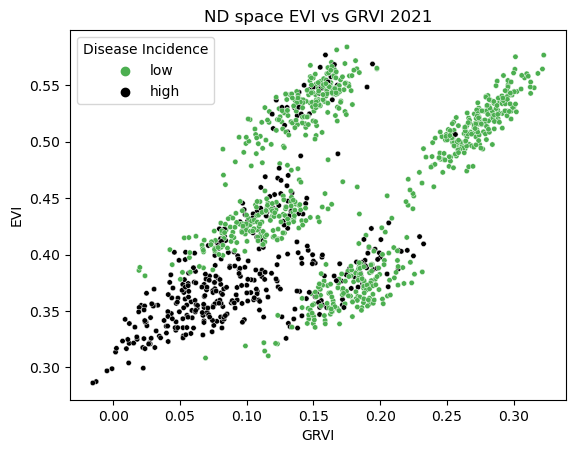

In [36]:
colors = ["#4CAF50", "#000000"]
sns.set_palette(sns.color_palette(colors))
sns.scatterplot(data=data_21, x='grvi', y='evi', s= 15, hue='inc_class').set(title='ND space EVI vs GRVI 2021')
plt.legend(title='Disease Incidence', loc='upper left')
plt.xlabel("GRVI", fontsize=10)
plt.ylabel("EVI", fontsize= 10)

Text(0, 0.5, 'EVI')

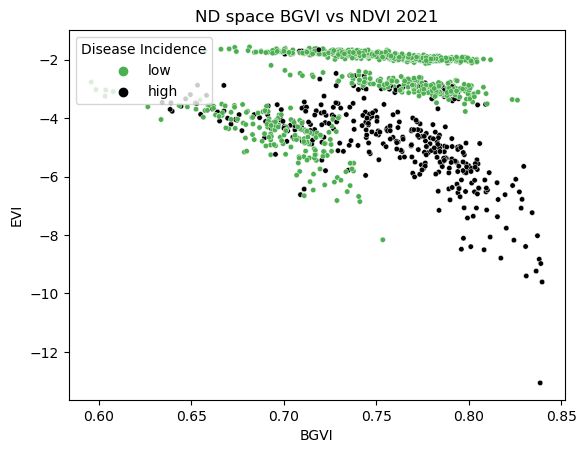

In [37]:
colors = ["#4CAF50", "#000000"]
sns.set_palette(sns.color_palette(colors))
sns.scatterplot(data=data_21, x='ndvi', y='bgvi', s= 15, hue='inc_class').set(title='ND space BGVI vs NDVI 2021')
plt.legend(title='Disease Incidence', loc='upper left')
plt.xlabel("BGVI", fontsize=10)
plt.ylabel("EVI", fontsize= 10)

Text(0, 0.5, 'EVI')

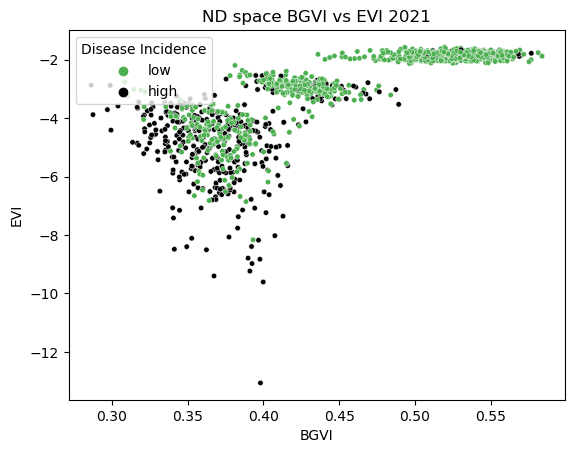

In [38]:
colors = ["#4CAF50", "#000000"]
sns.set_palette(sns.color_palette(colors))
sns.scatterplot(data=data_21, x='evi', y='bgvi', s= 15, hue='inc_class').set(title='ND space BGVI vs EVI 2021')
plt.legend(title='Disease Incidence', loc='upper left')
plt.xlabel("BGVI", fontsize=10)
plt.ylabel("EVI", fontsize= 10)

Text(0, 0.5, 'RGVI')

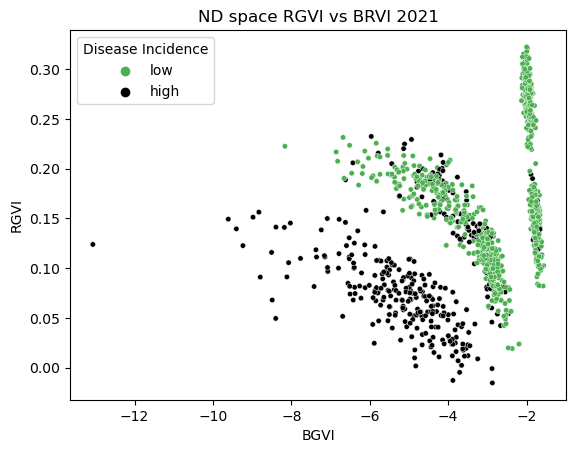

In [41]:
colors = ["#4CAF50", "#000000"]
sns.set_palette(sns.color_palette(colors))
sns.scatterplot(data=data_21, x='bgvi', y='grvi', s= 15, hue='inc_class').set(title='ND space RGVI vs BRVI 2021')
plt.legend(title='Disease Incidence', loc='upper left')
plt.xlabel("BGVI", fontsize=10)
plt.ylabel("RGVI", fontsize= 10)

In [43]:
data_21.Date.unique()

array(['2021-07-07', '2021-07-27', '2021-08-03', '2021-08-10',
       '2021-08-17'], dtype=object)

Text(0, 0.5, 'RGVI')

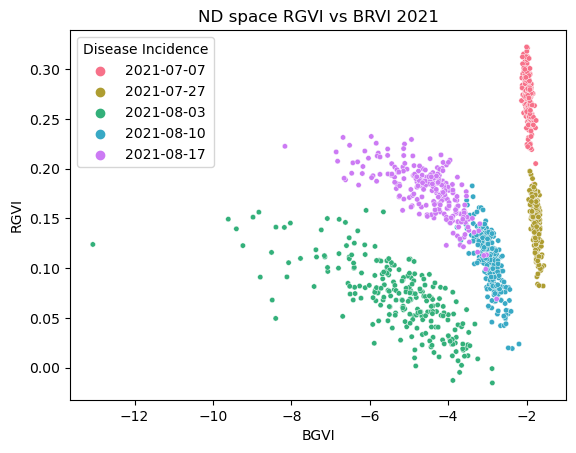

In [44]:
colors = ["#4CAF50", "#000000"]
sns.set_palette(sns.color_palette(colors))
sns.scatterplot(data=data_21, x='bgvi', y='grvi', s= 15, hue='Date').set(title='ND space RGVI vs BRVI 2021')
plt.legend(title='Disease Incidence', loc='upper left')
plt.xlabel("BGVI", fontsize=10)
plt.ylabel("RGVI", fontsize= 10)

Text(0, 0.5, 'EVI')

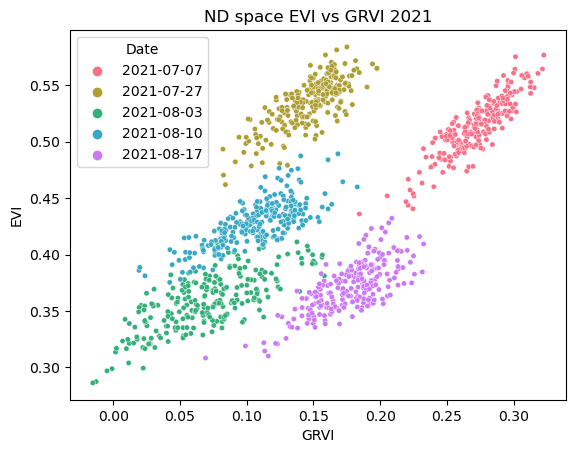

In [46]:
colors = ["#4CAF50", "#000000"]
sns.set_palette(sns.color_palette(colors))
sns.scatterplot(data=data_21, x='grvi', y='evi', s= 15, hue='Date').set(title='ND space EVI vs GRVI 2021')
plt.legend(title='Date', loc='upper left')
plt.xlabel("GRVI", fontsize=10)
plt.ylabel("EVI", fontsize= 10)

Text(0, 0.5, 'GRVI')

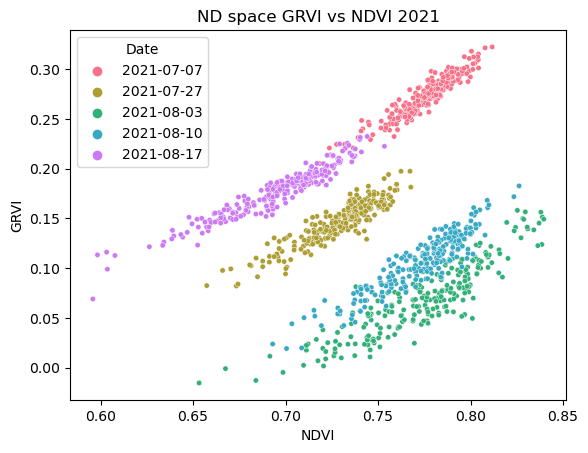

In [48]:
colors = ["#4CAF50", "#000000"]
sns.set_palette(sns.color_palette(colors))
sns.scatterplot(data=data_21, x='ndvi', y='grvi', s= 15, hue='Date').set(title='ND space GRVI vs NDVI 2021')
plt.legend(title='Date', loc='upper left')
plt.xlabel("NDVI", fontsize=10)
plt.ylabel("GRVI", fontsize= 10)

Text(0, 0.5, 'EVI')

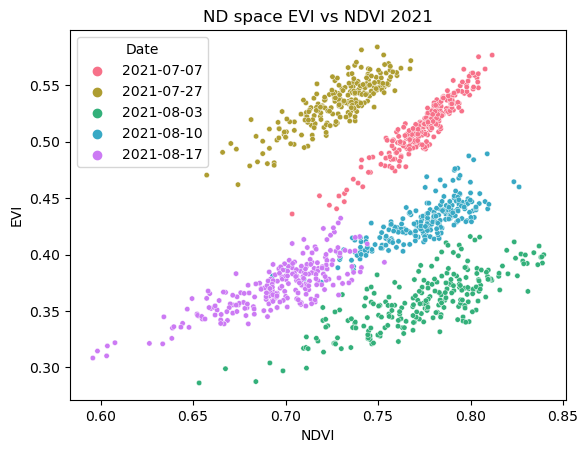

In [50]:
colors = ["#4CAF50", "#000000"]
sns.set_palette(sns.color_palette(colors))
sns.scatterplot(data=data_21, x='ndvi', y='evi', s= 15, hue='Date').set(title='ND space EVI vs NDVI 2021')
plt.legend(title='Date', loc='upper left')
plt.xlabel("NDVI", fontsize=10)
plt.ylabel("EVI", fontsize= 10)

Text(0, 0.5, 'EVI')

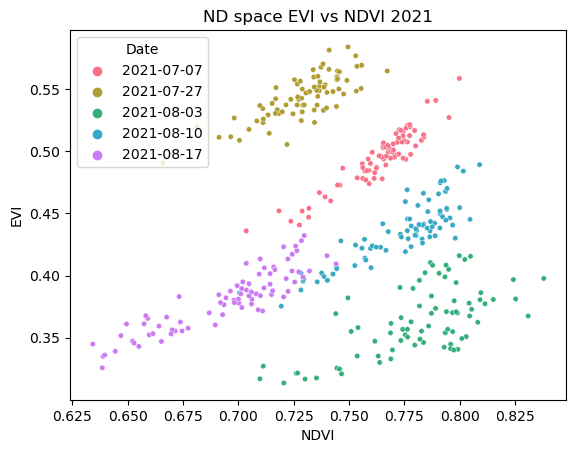

In [81]:
#try with just DM block
colors = ["#4CAF50", "#000000"]
sns.set_palette(sns.color_palette(colors))
sns.scatterplot(data=data_21[data_21['Block']=='DM'], x='ndvi', y='evi', s= 15, hue='Date').set(title='ND space EVI vs NDVI 2021')
plt.legend(title='Date', loc='upper left')
plt.xlabel("NDVI", fontsize=10)
plt.ylabel("EVI", fontsize= 10)

In [83]:
# Try pooling all 3 years

pooled = pd.concat(dfs)

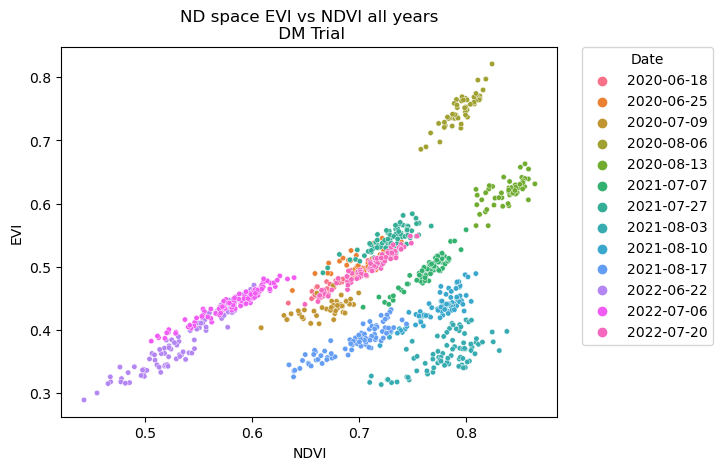

In [98]:
#try with just DM block
colors = ["#4CAF50", "#000000"]
sns.set_palette(sns.color_palette(colors))
sns.scatterplot(data=pooled[pooled['Block']=='DM'], x='ndvi', y='evi', s= 15, hue='Date').set(title='ND space EVI vs NDVI all years\n DM Trial')
plt.legend(title='Date', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.xlabel("NDVI", fontsize=10)
plt.ylabel("EVI", fontsize= 10)

plt.savefig('evi_by_ndvi_date.jpeg', transparent=True, bbox_inches='tight')

Text(0, 0.5, 'GRVI')

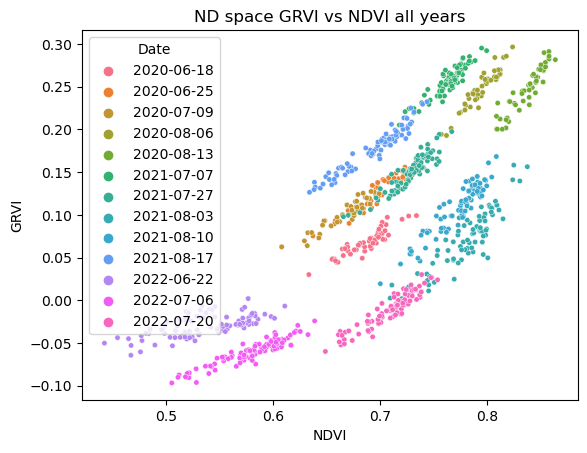

In [88]:
#try with just DM block
colors = ["#4CAF50", "#000000"]
sns.set_palette(sns.color_palette(colors))
sns.scatterplot(data=pooled[pooled['Block']=='DM'], x='ndvi', y='grvi', s= 15, hue='Date').set(title='ND space GRVI vs NDVI all years')
plt.legend(title='Date', loc='upper left')
plt.xlabel("NDVI", fontsize=10)
plt.ylabel("GRVI", fontsize= 10)

Text(0, 0.5, 'GRVI')

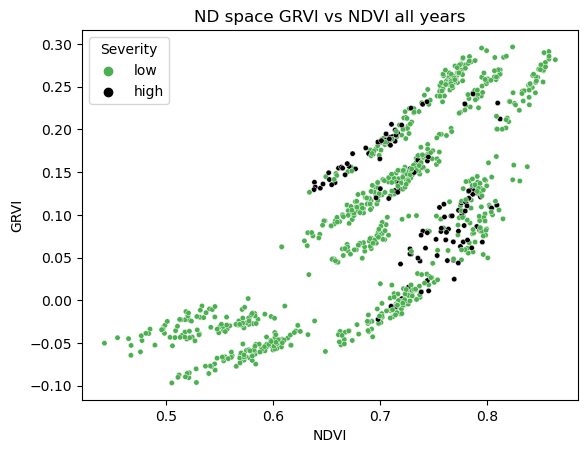

In [92]:
#try with just DM block
colors = ["#4CAF50", "#000000"]
sns.set_palette(sns.color_palette(colors))
sns.scatterplot(data=pooled[pooled['Block']=='DM'], x='ndvi', y='grvi', s= 15, hue='severity_class').set(title='ND space GRVI vs NDVI all years')
plt.legend(title='Severity', loc='upper left')
plt.xlabel("NDVI", fontsize=10)
plt.ylabel("GRVI", fontsize= 10)

Text(0, 0.5, 'EVI')

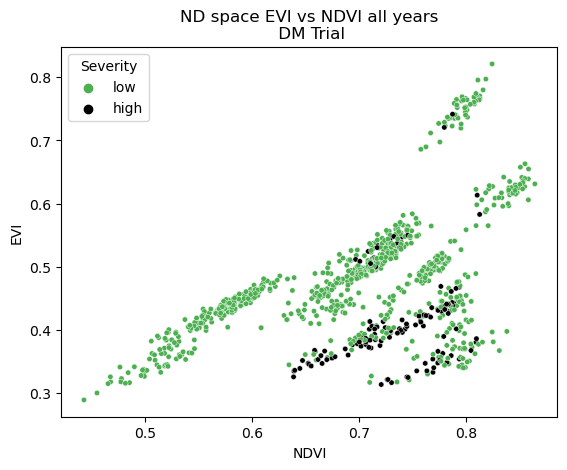

In [97]:
#try with just DM block
colors = ["#4CAF50", "#000000"]
sns.set_palette(sns.color_palette(colors))
sns.scatterplot(data=pooled[pooled['Block']=='DM'], x='ndvi', y='evi', s= 15, hue='severity_class').set(title='ND space EVI vs NDVI all years\n DM Trial')
plt.legend(title='Severity', loc='upper left')
plt.xlabel("NDVI", fontsize=10)
plt.ylabel("EVI", fontsize= 10)

<AxesSubplot: xlabel='Date', ylabel='evi'>

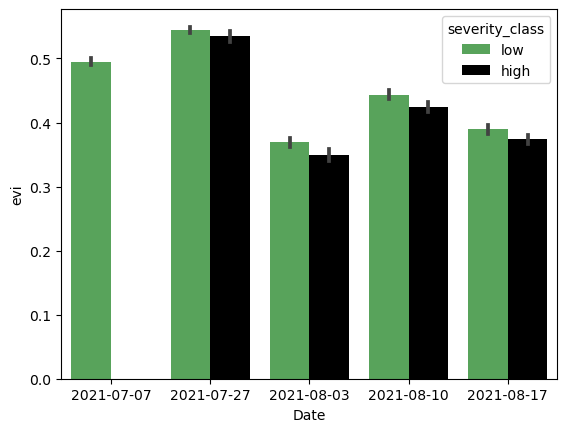

In [62]:
sns.barplot(data=data_21[data_21['Block']=='DM'], x='Date', y='evi', hue='severity_class')

In [59]:
data_21.columns

Index(['acquired', 'plot', 'blue', 'green', 'red', 'nir', 'row', 'panel',
       'Date', 'Treatment', 'Block', 'PM_severity', 'DM_severity', 'total_dis',
       'geometry', 'centroid', 'PM_inc', 'DM_inc', 'ndvi', 'evi', 'savi',
       'arvi', 'grvi', 'bgvi', 'gcc', 'gri', 'inc_class', 'severity_class',
       'ndvi_group'],
      dtype='object')

In [65]:
data_21.Date.unique()

array(['2021-07-07', '2021-07-27', '2021-08-03', '2021-08-10',
       '2021-08-17'], dtype=object)

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

2021-08-03_low v.s. 2021-08-03_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=7.647e-03 U_stat=9.870e+02
2021-07-27_low v.s. 2021-07-27_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.790e-01 U_stat=6.210e+02
2021-08-10_low v.s. 2021-08-10_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.007e-03 U_stat=1.171e+03
2021-08-17_low v.s. 2021-08-17_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.655e-02 U_stat=1.089e+03


Text(0.5, 1.0, 'EVI 2021, GDM Trial')

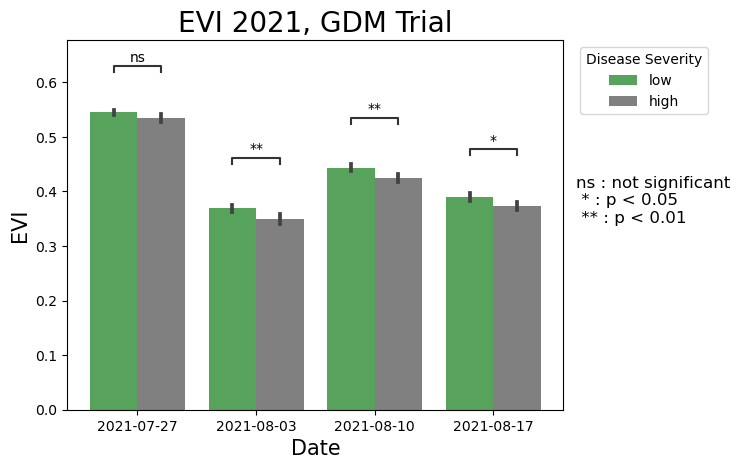

In [77]:
data = data_21[data_21['Block']=='DM']
x = "Date"
y = "evi"
hue = "severity_class"
hue_order=['low', 'high']
order = ['2021-07-27', '2021-08-03', '2021-08-10',
       '2021-08-17']
pairs=[
    ((order[0], "high"), (order[0], "low")),
    ((order[1], "high"), (order[1], "low")),
    ((order[2], "high"), (order[2], "low")),
    ((order[3], "high"), (order[3], "low"))
    ]

colors = ["#4CAF50", "#808080"]
sns.set_palette(sns.color_palette(colors))

ax = sns.barplot(data=data, x=x, y=y,
                 order=order, 
                 hue=hue, hue_order=hue_order)
#ax.set_xticklabels(labels = ['0.66-0.70','0.71-0.75','0.76-0.80','0.81-0.85'], 
                   #rotation=45)
add_stat_annotation(ax, data=data, x=x, y=y, 
                    order=order, 
                    hue=hue, 
                    box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("Date", fontsize=15)
plt.ylabel("EVI", fontsize= 15)
plt.legend(title='Disease Severity',loc='upper left', bbox_to_anchor=(1.02, 1) )
plt.figtext(0.92, 0.5, 'ns : not significant\n * : p < 0.05\n ** : p < 0.01', fontsize=12)
plt.title("EVI 2021, GDM Trial", fontsize=20)
#plt.savefig('evi_by_ndvi.jpeg', transparent=True, bbox_inches='tight')

In [72]:
data_20.Date.unique()

array(['2020-06-18', '2020-06-25', '2020-07-09', '2020-08-06',
       '2020-08-13'], dtype=object)

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

2020-08-13_low v.s. 2020-08-13_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.645e-01 U_stat=8.000e+01
2020-08-06_low v.s. 2020-08-06_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=5.943e-01 U_stat=7.100e+01


Text(0.5, 1.0, 'EVI 2020, GDM Trial')

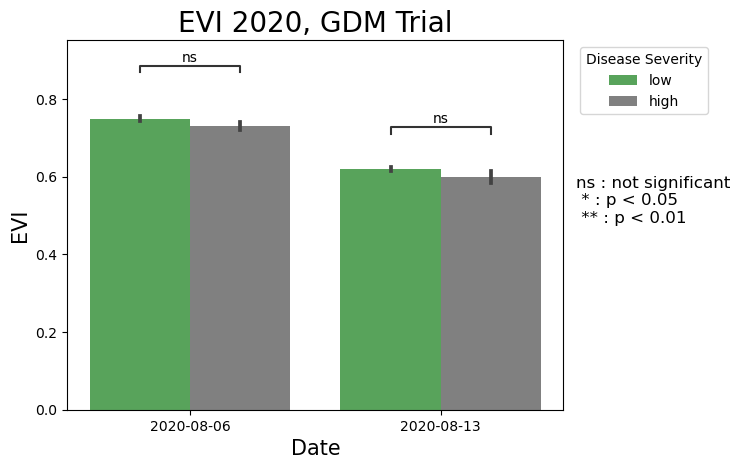

In [76]:
data = data_20[data_20['Block']=='DM']
x = "Date"
y = "evi"
hue = "severity_class"
hue_order=['low', 'high']
order = ['2020-08-06',
       '2020-08-13']
pairs=[
    ((order[0], "high"), (order[0], "low")),
    ((order[1], "high"), (order[1], "low"))
    ]

colors = ["#4CAF50", "#808080"]
sns.set_palette(sns.color_palette(colors))

ax = sns.barplot(data=data, x=x, y=y,
                 order=order, 
                 hue=hue, hue_order=hue_order)
#ax.set_xticklabels(labels = ['0.66-0.70','0.71-0.75','0.76-0.80','0.81-0.85'], 
                   #rotation=45)
add_stat_annotation(ax, data=data, x=x, y=y, 
                    order=order, 
                    hue=hue, 
                    box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("Date", fontsize=15)
plt.ylabel("EVI", fontsize= 15)
plt.legend(title='Disease Severity',loc='upper left', bbox_to_anchor=(1.02, 1) )
plt.figtext(0.92, 0.5, 'ns : not significant\n * : p < 0.05\n ** : p < 0.01', fontsize=12)
plt.title("EVI 2020, GDM Trial", fontsize=20)
#plt.savefig('evi_by_ndvi.jpeg', transparent=True, bbox_inches='tight')

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

2020-08-13_low v.s. 2020-08-13_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=2.280e+02
2020-08-06_low v.s. 2020-08-06_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=2.270e+02


Text(0.5, 1.0, 'EVI 2020, GDM Trial')

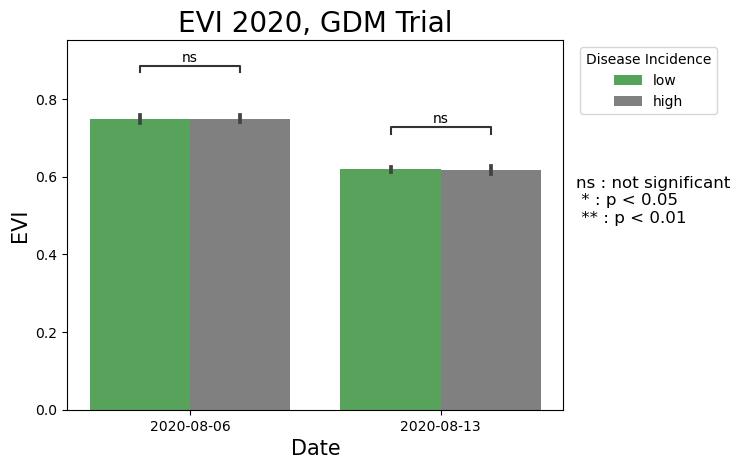

In [78]:
data = data_20[data_20['Block']=='DM']
x = "Date"
y = "evi"
hue = "inc_class"
hue_order=['low', 'high']
order = ['2020-08-06',
       '2020-08-13']
pairs=[
    ((order[0], "high"), (order[0], "low")),
    ((order[1], "high"), (order[1], "low"))
    ]

colors = ["#4CAF50", "#808080"]
sns.set_palette(sns.color_palette(colors))

ax = sns.barplot(data=data, x=x, y=y,
                 order=order, 
                 hue=hue, hue_order=hue_order)
#ax.set_xticklabels(labels = ['0.66-0.70','0.71-0.75','0.76-0.80','0.81-0.85'], 
                   #rotation=45)
add_stat_annotation(ax, data=data, x=x, y=y, 
                    order=order, 
                    hue=hue, 
                    box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("Date", fontsize=15)
plt.ylabel("EVI", fontsize= 15)
plt.legend(title='Disease Incidence',loc='upper left', bbox_to_anchor=(1.02, 1) )
plt.figtext(0.92, 0.5, 'ns : not significant\n * : p < 0.05\n ** : p < 0.01', fontsize=12)
plt.title("EVI 2020, GDM Trial", fontsize=20)
#plt.savefig('evi_by_ndvi.jpeg', transparent=True, bbox_inches='tight')

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

2021-08-10_low v.s. 2021-08-10_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=8.517e-01 U_stat=7.180e+02
2021-07-27_low v.s. 2021-07-27_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.771e-01 U_stat=8.930e+02
2021-08-17_low v.s. 2021-08-17_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.452e-01 U_stat=6.840e+02


Text(0.5, 1.0, 'EVI 2021, GDM Trial')

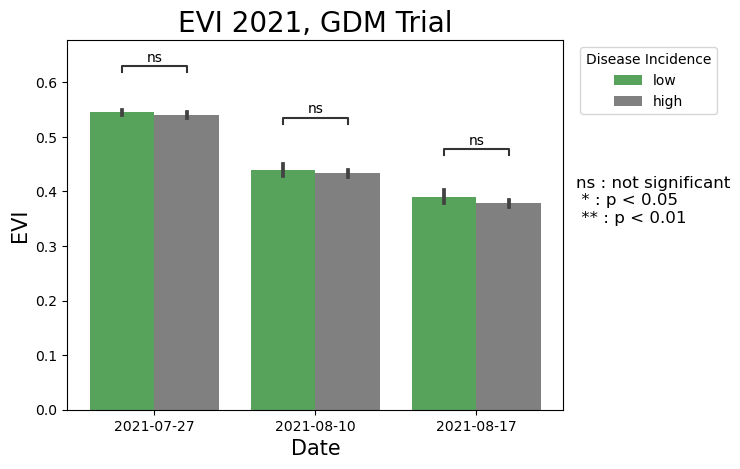

In [80]:
data = data_21[data_21['Block']=='DM']
x = "Date"
y = "evi"
hue = "inc_class"
hue_order=['low', 'high']
order = ['2021-07-27', '2021-08-10',
       '2021-08-17']
pairs=[
    ((order[0], "high"), (order[0], "low")),
    ((order[1], "high"), (order[1], "low")),
    ((order[2], "high"), (order[2], "low"))
    ]

colors = ["#4CAF50", "#808080"]
sns.set_palette(sns.color_palette(colors))

ax = sns.barplot(data=data, x=x, y=y,
                 order=order, 
                 hue=hue, hue_order=hue_order)
#ax.set_xticklabels(labels = ['0.66-0.70','0.71-0.75','0.76-0.80','0.81-0.85'], 
                   #rotation=45)
add_stat_annotation(ax, data=data, x=x, y=y, 
                    order=order, 
                    hue=hue, 
                    box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("Date", fontsize=15)
plt.ylabel("EVI", fontsize= 15)
plt.legend(title='Disease Incidence',loc='upper left', bbox_to_anchor=(1.02, 1) )
plt.figtext(0.92, 0.5, 'ns : not significant\n * : p < 0.05\n ** : p < 0.01', fontsize=12)
plt.title("EVI 2021, GDM Trial", fontsize=20)
#plt.savefig('evi_by_ndvi.jpeg', transparent=True, bbox_inches='tight')